In [2]:
#basic imports(7)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#data aquisition
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [4]:
#label - Survived
#categorical - Pclass,Sex,Embarked
#numerical - Age,Fare
#string - Name,Ticket
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info(),train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  )

<Axes: xlabel='Survived', ylabel='count'>

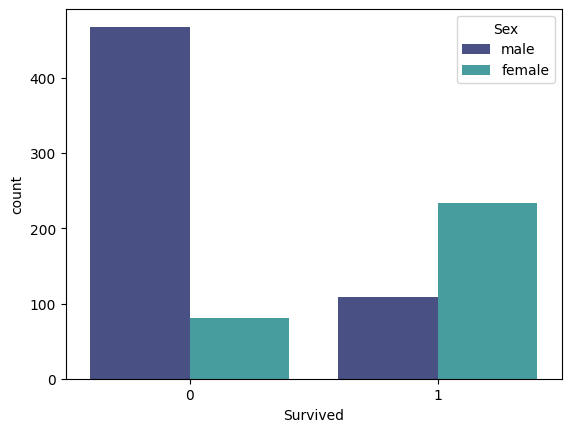

In [6]:
#visualization
#label / target plot
sns.countplot(x="Survived",data=train,hue="Sex",palette="mako")
#most males didnt survive

<Axes: xlabel='Survived', ylabel='count'>

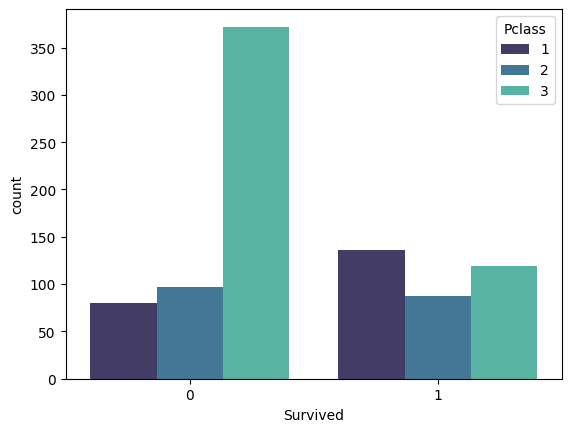

In [7]:
sns.countplot(x="Survived",data=train,hue="Pclass",palette="mako")
#most lowerclass people didnt survive

<Axes: xlabel='Sex', ylabel='count'>

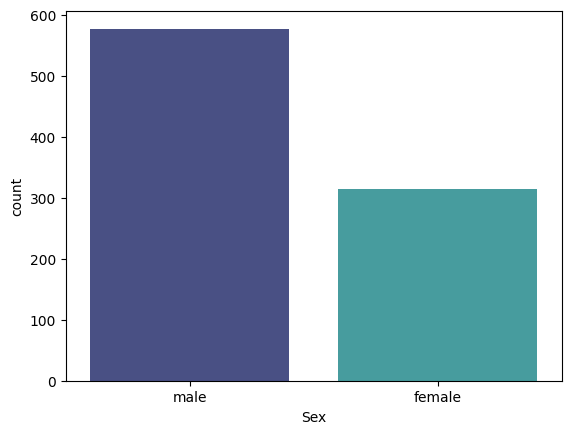

In [8]:
#countplot for other catgories
sns.countplot(x="Sex",data=train,palette="mako")

<Axes: xlabel='Pclass', ylabel='count'>

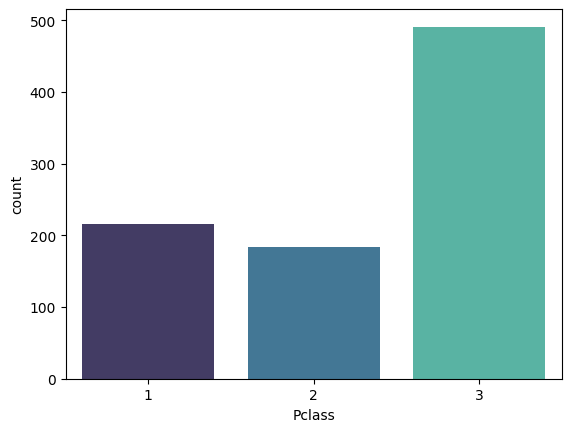

In [9]:
sns.countplot(x="Pclass",data=train,palette="mako")

<Axes: xlabel='Embarked', ylabel='count'>

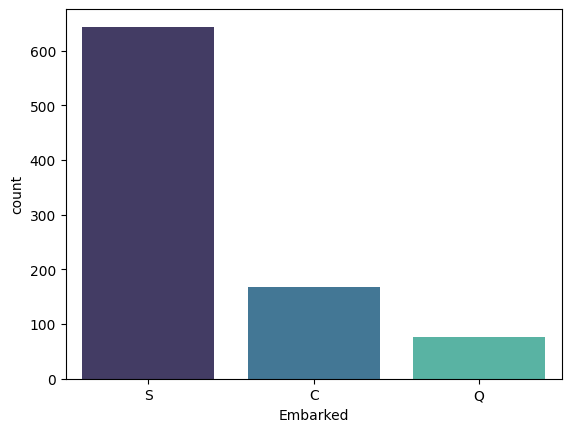

In [10]:
sns.countplot(x="Embarked",data=train,palette="mako")

<Axes: xlabel='SibSp', ylabel='count'>

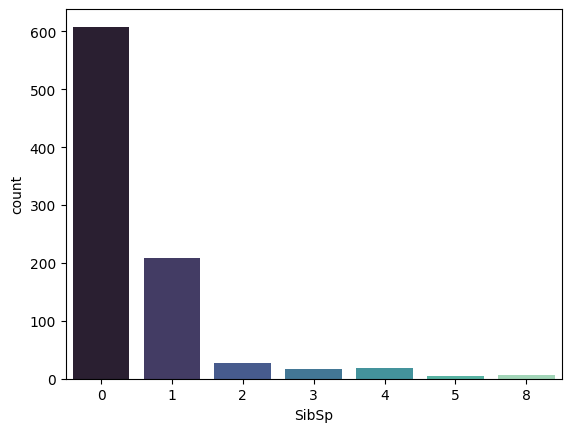

In [11]:
sns.countplot(x="SibSp",data=train,palette="mako")

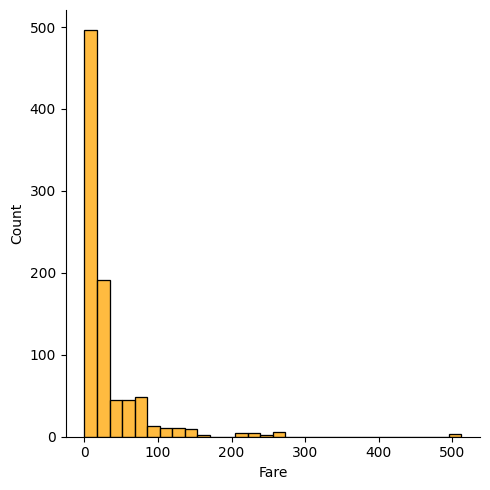

In [12]:
#displot for numerical
sns.displot(x='Fare',data=train,bins=30,color="orange")

<Axes: >

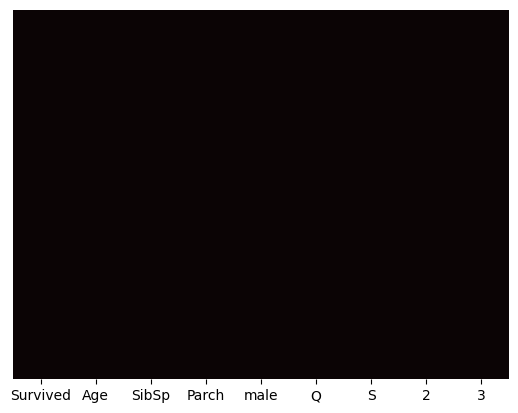

In [53]:
#null check
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="mako")


In [14]:
#filling Age column with mean
m_age_1 = train[train["Pclass"]==1]["Age"].mean()
m_age_2 = train[train["Pclass"]==2]["Age"].mean()
m_age_3 = train[train["Pclass"]==3]["Age"].mean()

In [15]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return m_age_1
        elif Pclass == 2:
            return m_age_2
        else:
            return m_age_3
    else:
        return Age
train["Age"] = train[["Age","Pclass"]].apply(impute_train_age,axis=1)

In [16]:
m_age_t1 = test[test["Pclass"]==1]["Age"].mean()
m_age_t2 = test[test["Pclass"]==2]["Age"].mean()
m_age_t3 = test[test["Pclass"]==3]["Age"].mean()

In [17]:
#for test data
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return m_age_t1
        elif Pclass == 2:
            return m_age_t2
        else:
            return m_age_t3
    else:
        return Age
test["Age"] = test[["Age","Pclass"]].apply(impute_test_age,axis=1)

<Axes: >

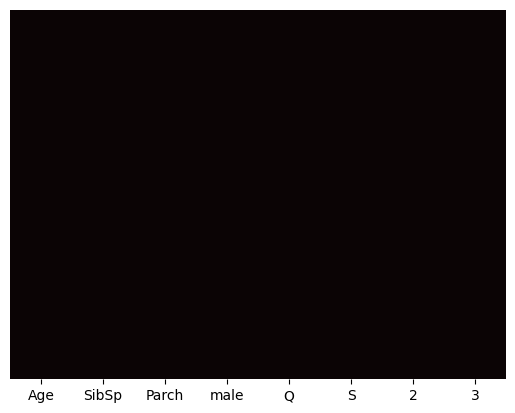

In [52]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="mako")


In [19]:
#removing useless columns
test.drop("Cabin",axis=1,inplace=True)
train.drop("Cabin",axis=1,inplace=True)

In [20]:
#dummy creation
sex = pd.get_dummies(train["Sex"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)
embark = pd.get_dummies(train["Embarked"],drop_first =True )

In [21]:
train = pd.concat([train,sex,pclass,embark],axis=1)

In [22]:
#test dummy
sex_t = pd.get_dummies(test["Sex"],drop_first = True)
pclass_t = pd.get_dummies(test["Pclass"],drop_first=True)
embark_t = pd.get_dummies(test["Embarked"],drop_first=True)

In [23]:
test = pd.concat([test,sex_t,pclass_t,embark_t],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [25]:
train.drop(["PassengerId","Pclass","Sex","Name","Ticket","Fare"],axis=1,inplace=True)

In [26]:
train.drop(["Embarked"],axis=1,inplace=True)

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [28]:
test.drop(["PassengerId","Pclass","Sex","Name","Ticket","Fare","Embarked"],axis=1,inplace=True)

In [29]:
#converting columns
train["2"] = train[2]
train["3"] = train[3]
test["2"] = test[2]
test["3"] = test[3]
train.drop([2,3],axis=1,inplace=True)
test.drop([2,3],axis=1,inplace=True)

In [30]:
#data split
X_train = train.drop("Survived",axis=1)
y_train = train["Survived"]
X_test = test


In [31]:
#model creation
log_model = LogisticRegression()

In [32]:
#training model
log_model.fit(X_train,y_train)

LogisticRegression()

In [43]:
test_2 = pd.read_csv("titanic_test.csv")

In [51]:
#test
predictions = log_model.predict(X_test)
pred = pd.concat([pred_2,test_2["PassengerId"]],axis=1)
pred.set_index("PassengerId",inplace=True)
pred.to_csv("titanic_predictions.csv")